In [1]:
import json

In [2]:
def read(path):
    with open(path) as f:
        res = json.load(f)
    return res

In [4]:
ImageNet = read('./ImageNet.json')

In [5]:
CelebA_Gender_29 = read('./Main[20]_Target[0]_29.json')

In [6]:
CelebA_IC_199 = read('./IC_199.json')

5_o_Clock_Shadow 4.11099999999999 5.1969999999999885
Arched_Eyebrows 5.0390000000000015 5.5800000000000125
Attractive 1.0500000000000114 1.1460000000000008
Bags_Under_Eyes 3.778999999999968 2.859999999999985
Bangs 2.1580000000000155 5.814999999999998
Big_Lips 0.9990000000000023 2.689000000000007
Big_Nose 2.394999999999996 1.046999999999997
Black_Hair -0.9410000000000167 3.6410000000000053
Blond_Hair -0.6070000000000135 2.4210000000000065
Blurry -0.11400000000000432 -5.23299999999999
Brown_Hair -0.17599999999998772 2.8119999999999976
Bushy_Eyebrows 2.2979999999999876 8.198999999999998
Chubby 1.1640000000000015 3.567999999999998
Double_Chin 0.37199999999997146 3.441999999999979
Eyeglasses 0.5729999999999791 0.8099999999999739
Goatee 2.7979999999999876 5.912999999999997
Gray_Hair -0.7630000000000052 2.639000000000024
Heavy_Makeup 4.277999999999992 4.468999999999994
High_Cheekbones 4.526999999999987 5.791999999999987
Male 5.045000000000002 4.380999999999972
Mouth_Slightly_Open 4.8019999999

In [10]:
PID_2_NAME = \
    {0: '5_o_Clock_Shadow',
     1: 'Arched_Eyebrows',
     2: 'Attractive',
     3: 'Bags_Under_Eyes',
     4: 'Bald',
     5: 'Bangs',
     6: 'Big_Lips',
     7: 'Big_Nose',
     8: 'Black_Hair',
     9: 'Blond_Hair',
     10: 'Blurry',
     11: 'Brown_Hair',
     12: 'Bushy_Eyebrows',
     13: 'Chubby',
     14: 'Double_Chin',
     15: 'Eyeglasses',
     16: 'Goatee',
     17: 'Gray_Hair',
     18: 'Heavy_Makeup',
     19: 'High_Cheekbones',
     20: 'Male',
     21: 'Mouth_Slightly_Open',
     22: 'Mustache',
     23: 'Narrow_Eyes',
     24: 'No_Beard',
     25: 'Oval_Face',
     26: 'Pale_Skin',
     27: 'Pointy_Nose',
     28: 'Receding_Hairline',
     29: 'Rosy_Cheeks',
     30: 'Sideburns',
     31: 'Smiling',
     32: 'Straight_Hair',
     33: 'Wavy_Hair',
     34: 'Wearing_Earrings',
     35: 'Wearing_Hat',
     36: 'Wearing_Lipstick',
     37: 'Wearing_Necklace',
     38: 'Wearing_Necktie',
     39: 'Young'}

In [12]:
lst = {}
for k, v in ImageNet.items():
    lst.update({
     PID_2_NAME[int(k)]: [CelebA_Gender_29[k][0]-v[0], CelebA_IC_199[k][0]-v[0]]
    })

In [15]:
print(lst)

{'5_o_Clock_Shadow': [4.11099999999999, 5.1969999999999885], 'Arched_Eyebrows': [5.0390000000000015, 5.5800000000000125], 'Attractive': [1.0500000000000114, 1.1460000000000008], 'Bags_Under_Eyes': [3.778999999999968, 2.859999999999985], 'Bangs': [2.1580000000000155, 5.814999999999998], 'Big_Lips': [0.9990000000000023, 2.689000000000007], 'Big_Nose': [2.394999999999996, 1.046999999999997], 'Black_Hair': [-0.9410000000000167, 3.6410000000000053], 'Blond_Hair': [-0.6070000000000135, 2.4210000000000065], 'Blurry': [-0.11400000000000432, -5.23299999999999], 'Brown_Hair': [-0.17599999999998772, 2.8119999999999976], 'Bushy_Eyebrows': [2.2979999999999876, 8.198999999999998], 'Chubby': [1.1640000000000015, 3.567999999999998], 'Double_Chin': [0.37199999999997146, 3.441999999999979], 'Eyeglasses': [0.5729999999999791, 0.8099999999999739], 'Goatee': [2.7979999999999876, 5.912999999999997], 'Gray_Hair': [-0.7630000000000052, 2.639000000000024], 'Heavy_Makeup': [4.277999999999992, 4.468999999999994]

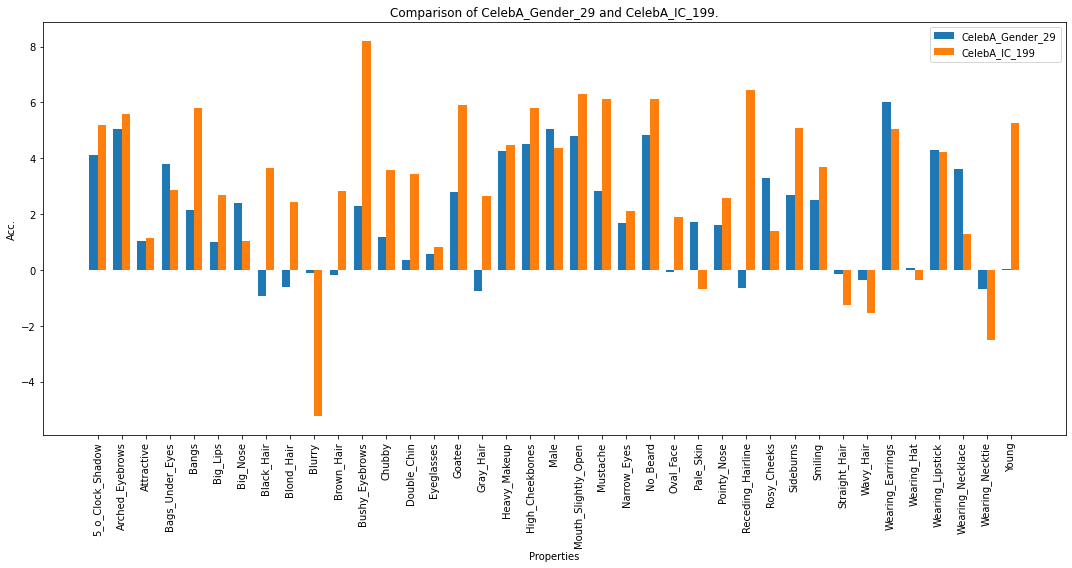

In [41]:
import matplotlib.pyplot as plt
import numpy as np

data = lst

# 提取方法1和方法2的数据
method1 = [data[key][0] for key in data]
method2 = [data[key][1] for key in data]
ind = np.arange(len(data))  # 指标的索引

fig, ax = plt.subplots(figsize=(15, 8))

width = 0.35  # 柱子的宽度
bar1 = ax.bar(ind - width/2, method1, width, label='CelebA_Gender_29')
bar2 = ax.bar(ind + width/2, method2, width, label='CelebA_IC_199')

# 设置图表标签和标题
ax.set_xlabel('Properties')
ax.set_ylabel('Acc.')
ax.set_title('Comparison of CelebA_Gender_29 and CelebA_IC_199.')
ax.set_xticks(ind)
ax.set_xticklabels(data.keys(), rotation=90)  # 设置x轴标签旋转90度
ax.legend()

# 显示柱状图
plt.tight_layout()
# 保存图片
plt.savefig('comparison_chart.png', dpi=300, bbox_inches='tight')  # 将图表保存为图片文件
# 展示图表
plt.show()

In [25]:
import wandb

# 登录到WandB，确保你的API密钥设置正确
wandb.login()

# 指定你要获取数据的项目和运行
entity = "tdye24"  # 团队名称
project = "VL"  # 项目名称
run_id = "ov7eob03"  # 运行的ID

# 初始化WandB运行
run = wandb.init(entity=entity, project=project, id=run_id, resume="allow")

# 使用API获取特定运行的数据
api = wandb.Api()
run = api.run(f"{entity}/{project}/{run_id}")

# 获取运行的所有指标数据
history = run.history()

# 输出运行的指标数据
print(history)


wandb: Currently logged in as: tdye24. Use `wandb login --relogin` to force relogin


   round   TestAcc  TrainLoss  _step  _runtime  TargetTestAcc  TargetValidAcc  \
0      0  0.886157   0.311705      0       189         0.7536            0.83   
1      9  0.959016   0.108664      1       401         0.7541            0.81   

   TrainAcc  TestLoss  CorrespondingTargetTestAcc  _timestamp  \
0  0.893377  0.315229                      0.7536  1701252192   
1  0.964614  0.115594                      0.7536  1701252404   

   BestTargetValidAcc  
0                0.83  
1                0.83  


In [27]:
history.keys()

Index(['round', 'TestAcc', 'TrainLoss', '_step', '_runtime', 'TargetTestAcc',
       'TargetValidAcc', 'TrainAcc', 'TestLoss', 'CorrespondingTargetTestAcc',
       '_timestamp', 'BestTargetValidAcc'],
      dtype='object')

In [28]:
history['CorrespondingTargetTestAcc']

0    0.7536
1    0.7536
Name: CorrespondingTargetTestAcc, dtype: float64

ImageNet

In [30]:
res = [0.48833333333333334, 0.4700665188470067, 0.5127777777777778, 0.4750277469478357, 0.49083842309827874, 0.5294444444444445, 0.4938888888888889, 0.4450610432852386, 0.46111111111111114, 0.42207432057681643]
print("ImageNet", np.mean(res), "+/-", np.std(res, ddof=1))

ImageNet 0.4788623608310732 +/- 0.0315212682566934


In [34]:
res = [0.5044444444444445, 0.5060975609756098, 0.5405555555555556, 0.51165371809101, 0.5596890616324264, 0.5905555555555555, 0.5144444444444445, 0.5105438401775805, 0.5244444444444445, 0.4653355518580144]
print("CelebA_Gender_29", np.mean(res), "+/-", np.std(res, ddof=1))

CelebA_Gender_29 0.5227764177179085 +/- 0.03420835768273396


### 相较于ImageNet，CelebA在各下游任务平均提升了多少？

In [40]:
CelebA_Gender_29_Improve = [v[0] for k, v in lst.items()]
CelebA_IC_199_Improve = [v[1] for k, v in lst.items()]
print("CelebA_Gender_29_Improve", np.mean(CelebA_Gender_29_Improve))
print("CelebA_IC_199_Improve", np.mean(CelebA_IC_199_Improve))

CelebA_Gender_29_Improve 1.9512564102564052
CelebA_IC_199_Improve 3.0343846153846137


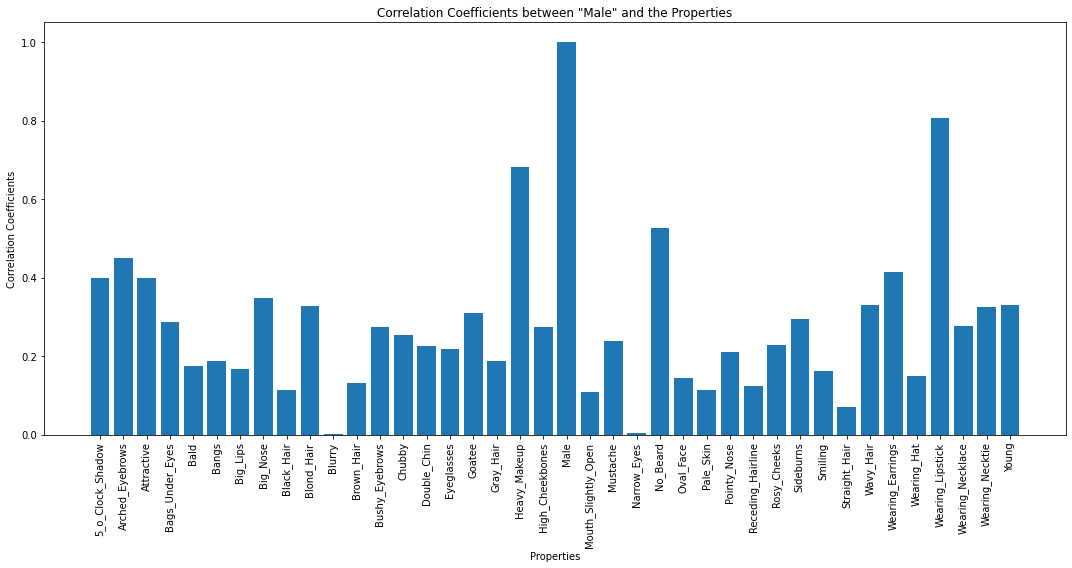

In [47]:
import matplotlib.pyplot as plt

# 数据
PID_2_NAME = {
    0: '5_o_Clock_Shadow', 1: 'Arched_Eyebrows', 2: 'Attractive', 3: 'Bags_Under_Eyes', 4: 'Bald',
    5: 'Bangs', 6: 'Big_Lips', 7: 'Big_Nose', 8: 'Black_Hair', 9: 'Blond_Hair', 10: 'Blurry',
    11: 'Brown_Hair', 12: 'Bushy_Eyebrows', 13: 'Chubby', 14: 'Double_Chin', 15: 'Eyeglasses',
    16: 'Goatee', 17: 'Gray_Hair', 18: 'Heavy_Makeup', 19: 'High_Cheekbones', 20: 'Male',
    21: 'Mouth_Slightly_Open', 22: 'Mustache', 23: 'Narrow_Eyes', 24: 'No_Beard', 25: 'Oval_Face',
    26: 'Pale_Skin', 27: 'Pointy_Nose', 28: 'Receding_Hairline', 29: 'Rosy_Cheeks', 30: 'Sideburns',
    31: 'Smiling', 32: 'Straight_Hair', 33: 'Wavy_Hair', 34: 'Wearing_Earrings', 35: 'Wearing_Hat',
    36: 'Wearing_Lipstick', 37: 'Wearing_Necklace', 38: 'Wearing_Necktie', 39: 'Young'
}

y = [
    0.3991061486257159, -0.4497455019257503, -0.39776188624243786, 0.28757679455473106, 0.1756229769157575,
    -0.18761953178377175, -0.16606189018305123, 0.3488932009707795, 0.11484303159078077, -0.3279135923969202,
    -0.001620018238493912, -0.13194755414771028, 0.2732072726878063, 0.25327562074643845, 0.22694186858435358,
    0.21752121445780032, 0.31000636102410034, 0.18709756949202308, -0.6824507253568991, -0.2751091713646689,
    1.0, -0.1079112911171155, 0.23764650169316442, -0.003571389261106841, -0.5272497497771134, -0.14384792885522477,
    -0.11374641319917458, -0.21061978675367815, 0.12319413601403041, -0.22865750640632962, 0.2952639124467555,
    -0.16277291836729607, 0.06966472787771348, -0.33115308452309467, -0.41403139971204084, 0.15005140463995364,
    -0.8070617801055177, -0.2774107708873258, 0.32539019705847955, -0.3310337201412798
]
y = [abs(item) for item in y]

# 提取x和y数据
x = [PID_2_NAME[key] for key in PID_2_NAME.keys()]

# 创建条形图
plt.figure(figsize=(15, 8))
plt.bar(x, y)

# 设置标签和标题
plt.xlabel('Properties')
plt.ylabel('Correlation Coefficients')
plt.title('Correlation Coefficients between "Male" and the Properties')

# 旋转x轴标签，避免重叠
plt.xticks(rotation=90)

# 显示图表
# 显示柱状图
plt.tight_layout()
# 保存图片
plt.savefig('correlation.png', dpi=300, bbox_inches='tight')  # 将图表保存为图片文件
# 展示图表
plt.show()

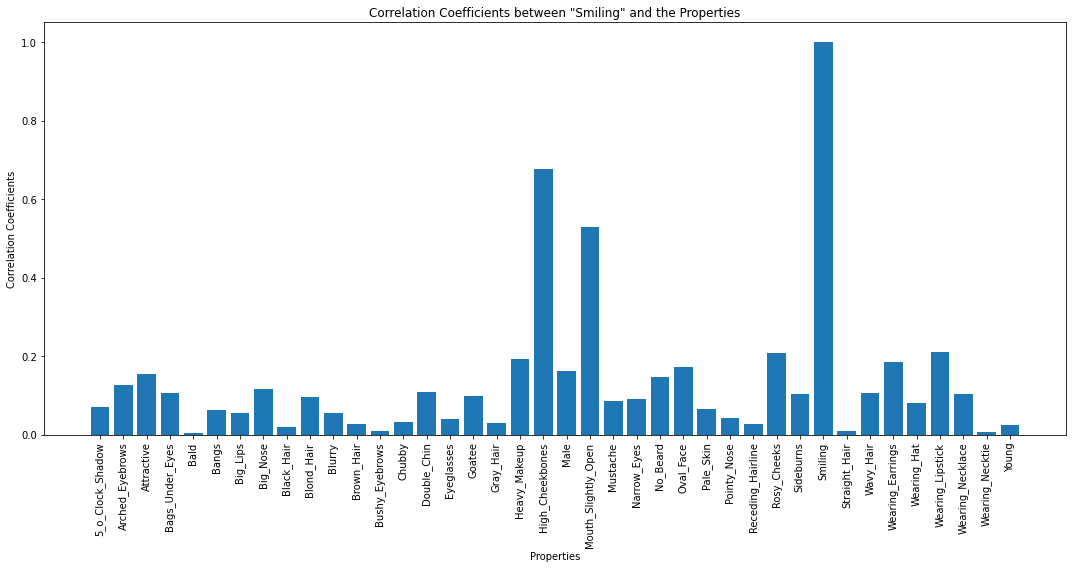

In [48]:
import matplotlib.pyplot as plt

# 数据
PID_2_NAME = {
    0: '5_o_Clock_Shadow', 1: 'Arched_Eyebrows', 2: 'Attractive', 3: 'Bags_Under_Eyes', 4: 'Bald',
    5: 'Bangs', 6: 'Big_Lips', 7: 'Big_Nose', 8: 'Black_Hair', 9: 'Blond_Hair', 10: 'Blurry',
    11: 'Brown_Hair', 12: 'Bushy_Eyebrows', 13: 'Chubby', 14: 'Double_Chin', 15: 'Eyeglasses',
    16: 'Goatee', 17: 'Gray_Hair', 18: 'Heavy_Makeup', 19: 'High_Cheekbones', 20: 'Male',
    21: 'Mouth_Slightly_Open', 22: 'Mustache', 23: 'Narrow_Eyes', 24: 'No_Beard', 25: 'Oval_Face',
    26: 'Pale_Skin', 27: 'Pointy_Nose', 28: 'Receding_Hairline', 29: 'Rosy_Cheeks', 30: 'Sideburns',
    31: 'Smiling', 32: 'Straight_Hair', 33: 'Wavy_Hair', 34: 'Wearing_Earrings', 35: 'Wearing_Hat',
    36: 'Wearing_Lipstick', 37: 'Wearing_Necklace', 38: 'Wearing_Necktie', 39: 'Young'
}

y = [-0.07013825943555571, 0.12708992235193625, 0.15348112365162134, 0.10531453788498091, -0.005360120397480131, 0.06191603567976907, 0.05533612239471897, 0.11707989374125279, -0.02023748035700297, 0.0963020254508126, -0.055089616242499306, 0.026655514618477046, -0.009066316642633337, 0.03137769742550837, 0.10927895499883224, -0.03965390105262833, -0.09908142707429246, 0.030831756772073282, 0.192833655273263, 0.6769503248219826, -0.16277291836729604, 0.5299447793786588, -0.08612531949985042, 0.09047685003441329, 0.14791420716476805, 0.17223318124231787, -0.06465276773805873, 0.04293284768194101, 0.026314896828022297, 0.20918521357327258, -0.10235191786570473, 1.0, -0.008463846662854616, 0.10532875477786198, 0.18524770328786616, -0.08007532453390573, 0.21064501511924513, 0.10469245897845189, -0.007618101002986946, -0.02395021558959054]
y = [abs(item) for item in y]

# 提取x和y数据
x = [PID_2_NAME[key] for key in PID_2_NAME.keys()]

# 创建条形图
plt.figure(figsize=(15, 8))
plt.bar(x, y)

# 设置标签和标题
plt.xlabel('Properties')
plt.ylabel('Correlation Coefficients')
plt.title('Correlation Coefficients between "Smiling" and the Properties')

# 旋转x轴标签，避免重叠
plt.xticks(rotation=90)

# 显示图表
# 显示柱状图
plt.tight_layout()
# 保存图片
plt.savefig('correlation.png', dpi=300, bbox_inches='tight')  # 将图表保存为图片文件
# 展示图表
plt.show()

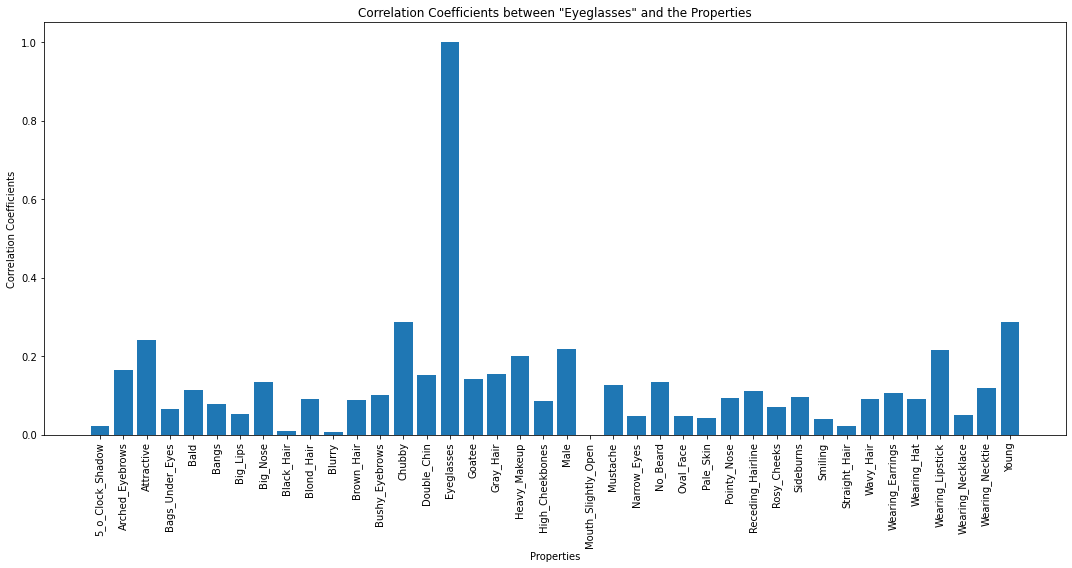

In [49]:
import matplotlib.pyplot as plt

# 数据
PID_2_NAME = {
    0: '5_o_Clock_Shadow', 1: 'Arched_Eyebrows', 2: 'Attractive', 3: 'Bags_Under_Eyes', 4: 'Bald',
    5: 'Bangs', 6: 'Big_Lips', 7: 'Big_Nose', 8: 'Black_Hair', 9: 'Blond_Hair', 10: 'Blurry',
    11: 'Brown_Hair', 12: 'Bushy_Eyebrows', 13: 'Chubby', 14: 'Double_Chin', 15: 'Eyeglasses',
    16: 'Goatee', 17: 'Gray_Hair', 18: 'Heavy_Makeup', 19: 'High_Cheekbones', 20: 'Male',
    21: 'Mouth_Slightly_Open', 22: 'Mustache', 23: 'Narrow_Eyes', 24: 'No_Beard', 25: 'Oval_Face',
    26: 'Pale_Skin', 27: 'Pointy_Nose', 28: 'Receding_Hairline', 29: 'Rosy_Cheeks', 30: 'Sideburns',
    31: 'Smiling', 32: 'Straight_Hair', 33: 'Wavy_Hair', 34: 'Wearing_Earrings', 35: 'Wearing_Hat',
    36: 'Wearing_Lipstick', 37: 'Wearing_Necklace', 38: 'Wearing_Necktie', 39: 'Young'
}

y = [-0.021221463053567518, -0.16529909775300763, -0.24164047767928631, -0.06413535158283122, 0.11484240713774545, -0.07734671589593582, -0.05380346089769898, 0.1334303498825144, 0.01018862180465228, -0.09068005604713716, -0.007807596210376784, -0.08903390270564374, -0.10200696575480386, 0.2865735827372566, 0.15224526399507435, 0.9999999999999998, 0.1419382208604167, 0.15367811369783102, -0.19934920879922607, -0.08536111142726109, 0.21752121445780032, -0.00021389078496069364, 0.12658937617630794, -0.04680807633289902, -0.13518729300994772, -0.048550551700889615, -0.04330191243130642, -0.09257511893717726, 0.11028987703943165, -0.06957039924594763, 0.095947731831134, -0.03965390105262833, -0.02225341002676553, -0.09061834164910047, -0.10564488022413444, 0.09117303146012329, -0.21474465681465016, -0.050799159994675804, 0.11901017431381217, -0.2879615256939737]
y = [abs(item) for item in y]

# 提取x和y数据
x = [PID_2_NAME[key] for key in PID_2_NAME.keys()]

# 创建条形图
plt.figure(figsize=(15, 8))
plt.bar(x, y)

# 设置标签和标题
plt.xlabel('Properties')
plt.ylabel('Correlation Coefficients')
plt.title('Correlation Coefficients between "Eyeglasses" and the Properties')

# 旋转x轴标签，避免重叠
plt.xticks(rotation=90)

# 显示图表
# 显示柱状图
plt.tight_layout()
# 保存图片
plt.savefig('correlation.png', dpi=300, bbox_inches='tight')  # 将图表保存为图片文件
# 展示图表
plt.show()

In [50]:
y = [-0.07013825943555571, 0.12708992235193625, 0.15348112365162134, 0.10531453788498091, -0.005360120397480131, 0.06191603567976907, 0.05533612239471897, 0.11707989374125279, -0.02023748035700297, 0.0963020254508126, -0.055089616242499306, 0.026655514618477046, -0.009066316642633337, 0.03137769742550837, 0.10927895499883224, -0.03965390105262833, -0.09908142707429246, 0.030831756772073282, 0.192833655273263, 0.6769503248219826, -0.16277291836729604, 0.5299447793786588, -0.08612531949985042, 0.09047685003441329, 0.14791420716476805, 0.17223318124231787, -0.06465276773805873, 0.04293284768194101, 0.026314896828022297, 0.20918521357327258, -0.10235191786570473, 1.0, -0.008463846662854616, 0.10532875477786198, 0.18524770328786616, -0.08007532453390573, 0.21064501511924513, 0.10469245897845189, -0.007618101002986946, -0.02395021558959054]
y = [abs(item) for item in y]
sorted(y)

[0.005360120397480131,
 0.007618101002986946,
 0.008463846662854616,
 0.009066316642633337,
 0.02023748035700297,
 0.02395021558959054,
 0.026314896828022297,
 0.026655514618477046,
 0.030831756772073282,
 0.03137769742550837,
 0.03965390105262833,
 0.04293284768194101,
 0.055089616242499306,
 0.05533612239471897,
 0.06191603567976907,
 0.06465276773805873,
 0.07013825943555571,
 0.08007532453390573,
 0.08612531949985042,
 0.09047685003441329,
 0.0963020254508126,
 0.09908142707429246,
 0.10235191786570473,
 0.10469245897845189,
 0.10531453788498091,
 0.10532875477786198,
 0.10927895499883224,
 0.11707989374125279,
 0.12708992235193625,
 0.14791420716476805,
 0.15348112365162134,
 0.16277291836729604,
 0.17223318124231787,
 0.18524770328786616,
 0.192833655273263,
 0.20918521357327258,
 0.21064501511924513,
 0.5299447793786588,
 0.6769503248219826,
 1.0]

In [54]:
y.index(0.007618101002986946)

38

In [55]:
colored = {0: 868,
1: 1000,
2: 858,
3: 909,
4: 883,
5: 764,
6: 893,
7: 948,
8: 835,
9: 877}
xx = sum([v for k, v in colored.items()])
print(xx)

8835


In [59]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# 生成随机数据
x = np.random.rand(100)
y = np.random.rand(100)
z = np.random.rand(100)

# 创建图表对象
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制散点图
ax.scatter(x, y, z)

# 显示图表，并进行交互操作（旋转、缩放等）
plt.show()

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

data = lst

# 提取方法1和方法2的数据
method1 = [data[key][0] for key in data]
method2 = [data[key][1] for key in data]
ind = np.arange(len(data))  # 指标的索引

fig, ax = plt.subplots(figsize=(15, 8))

width = 0.35  # 柱子的宽度
bar1 = ax.bar(ind - width/2, method1, width, label='CelebA_Gender_29')
bar2 = ax.bar(ind + width/2, method2, width, label='CelebA_IC_199')

# 设置图表标签和标题
ax.set_xlabel('Properties')
ax.set_ylabel('Acc.')
ax.set_title('Comparison of CelebA_Gender_29 and CelebA_IC_199.')
ax.set_xticks(ind)
ax.set_xticklabels(data.keys(), rotation=90)  # 设置x轴标签旋转90度
ax.legend()

# 显示柱状图
plt.tight_layout()
# 保存图片
plt.savefig('comparison_chart.png', dpi=300, bbox_inches='tight')  # 将图表保存为图片文件
# 展示图表
plt.show()